In [16]:
# Check the versions of libraries

# Python version
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy
import numpy as np
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas as pd
print('pandas: {}'.format(pd.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

# Import seaborn and matplotlib for plotting
import seaborn as sns
import matplotlib.pyplot as plt

# Reading the CSV file 
df = pd.read_csv("Iris.csv") 

Python: 3.11.4 (main, Jul  5 2023, 08:54:11) [Clang 14.0.6 ]
scipy: 1.14.1
numpy: 2.1.1
matplotlib: 3.9.2
pandas: 2.2.2
sklearn: 1.5.2


In [17]:
# Printing top 5 rows 
print(df.head())

# Print shape of the dataframe
print("________\nShape")
print(df.shape)

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
________
Shape
(150, 6)


In [18]:
# Info of the dataframe
print("Info")
print(df.info())

# Numerical summary of the dataframe
print("_____\nSummary")
print(df.describe())

Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None
_____
Summary
               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50

In [19]:
# Check for missing values
print(df.isnull().sum())

print("_______\nDropping Duplicates")
# Drop duplicates based on 'Species' column
data = df.drop_duplicates(subset="Species")
print(data)

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64
_______
Dropping Duplicates
      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
50    51            7.0           3.2            4.7           1.4   
100  101            6.3           3.3            6.0           2.5   

             Species  
0        Iris-setosa  
50   Iris-versicolor  
100   Iris-virginica  


Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


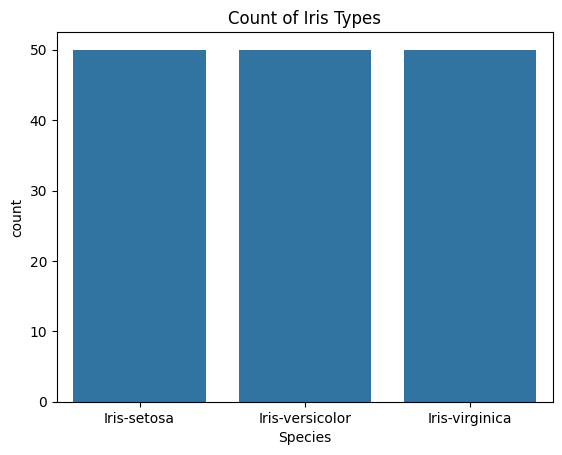

In [20]:
#Species count
print(df.value_counts("Species"))

# Countplot of species
sns.countplot(x='Species', data=df)
plt.title('Count of Iris Types')
plt.show()


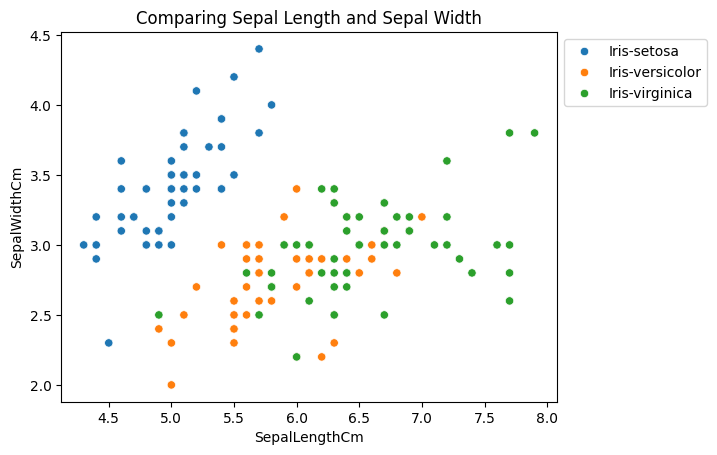

In [21]:
#Comparing Sepal Length and Sepal Width

sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', 
				hue='Species', data=df, ) 

plt.title('Comparing Sepal Length and Sepal Width')

# Placing Legend outside the Figure 
plt.legend(bbox_to_anchor=(1, 1), loc=2) 
plt.show()

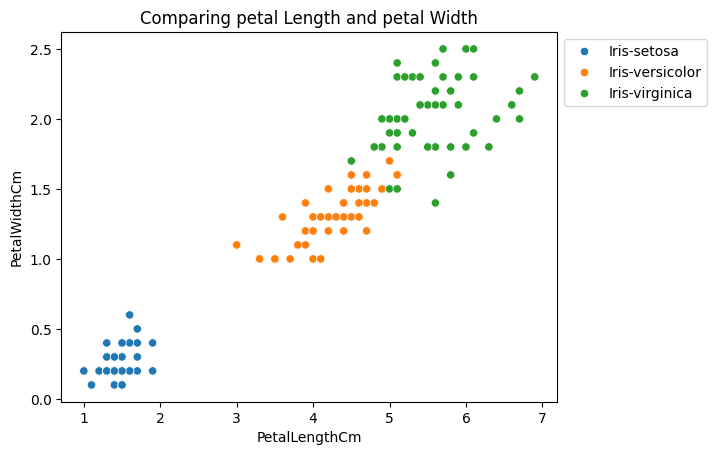

In [22]:
# compating petal length to width

sns.scatterplot(x='PetalLengthCm', y='PetalWidthCm', 
				hue='Species', data=df, ) 

# Placing Legend outside the Figure 
plt.legend(bbox_to_anchor=(1, 1), loc=2) 
plt.title('Comparing petal Length and petal Width')
plt.show()

/var/folders/n9/wq5l7d6j1k7fdcsnktf1kv5h0000gn/T/ipykernel_58554/3132200805.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(bbox_to_anchor=(1, 1), loc=2)


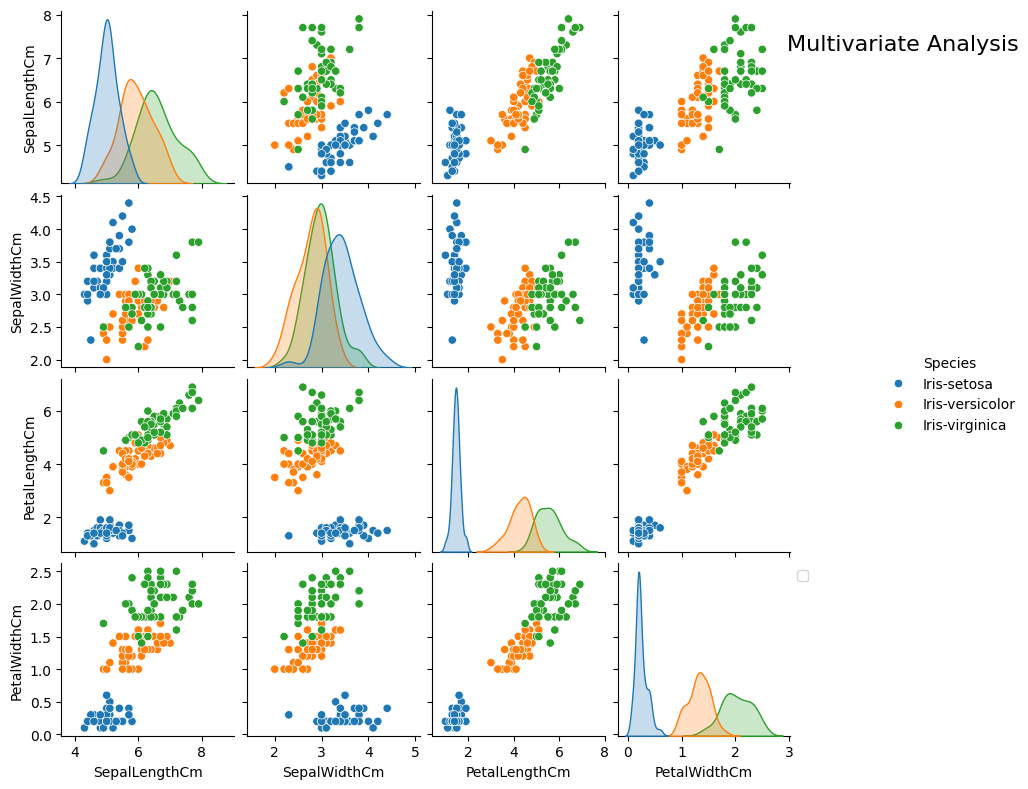

In [23]:
#showing multiple scatterplots
sns.pairplot(df.drop(['Id'], axis = 1),  
             hue='Species', height=2)
# Placing Legend outside the Figure 
plt.legend(bbox_to_anchor=(1, 1), loc=2) 
plt.suptitle('Multivariate Analysis', x=0.95, y=0.95, fontsize=16)
plt.show()

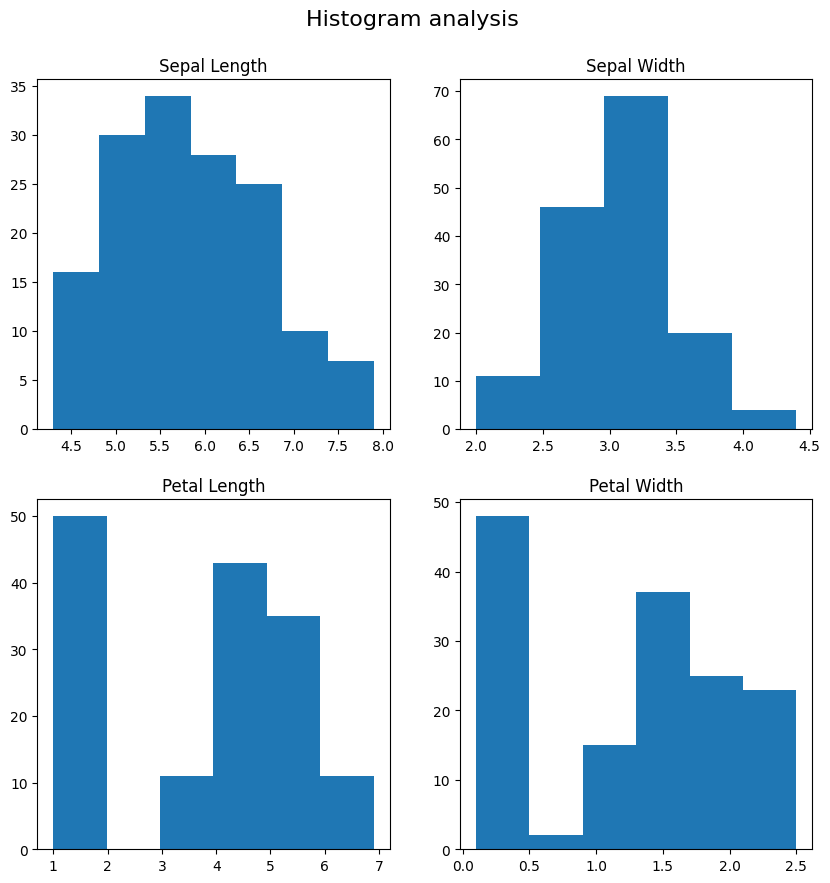

In [24]:
#histogram
fig, axes = plt.subplots(2, 2, figsize=(10,10)) 
  
axes[0,0].set_title("Sepal Length") 
axes[0,0].hist(df['SepalLengthCm'], bins=7) 
  
axes[0,1].set_title("Sepal Width") 
axes[0,1].hist(df['SepalWidthCm'], bins=5); 
  
axes[1,0].set_title("Petal Length") 
axes[1,0].hist(df['PetalLengthCm'], bins=6); 
  
axes[1,1].set_title("Petal Width") 
axes[1,1].hist(df['PetalWidthCm'], bins=6); 
plt.suptitle('Histogram analysis', x=.5, y=0.95, fontsize=16)
plt.show()

Text(0.5, 0.95, 'PetalWidthCm vs density')

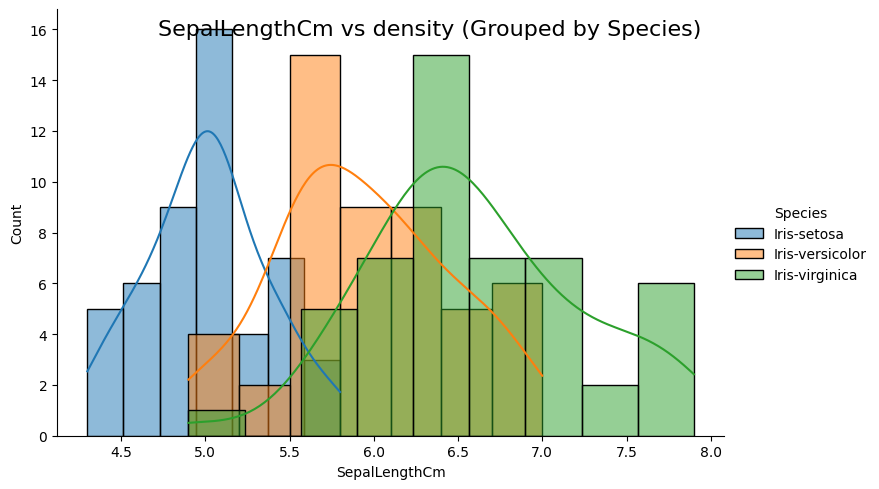

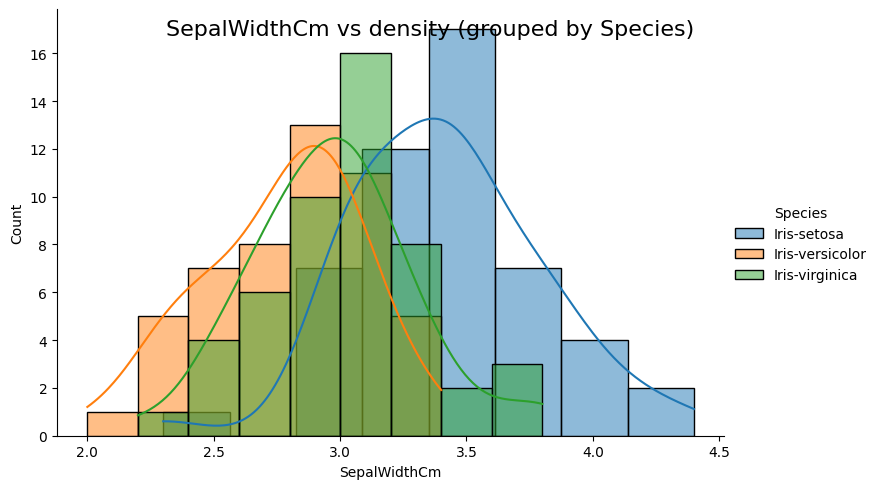

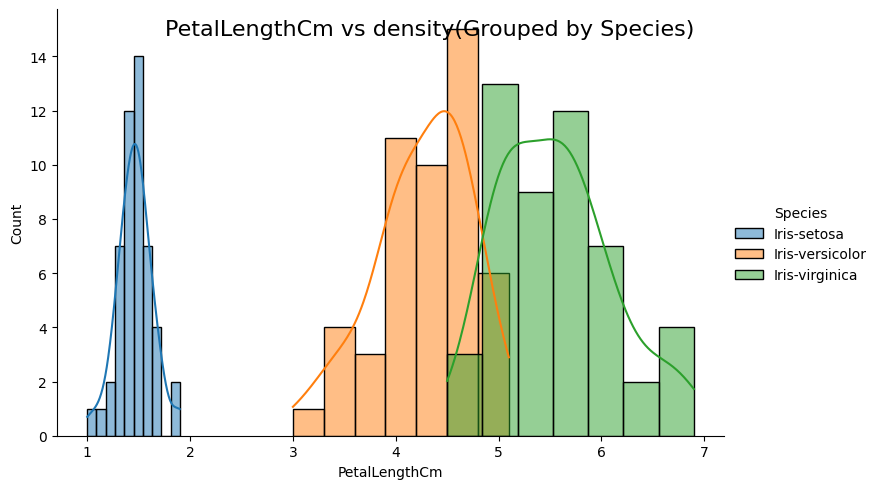

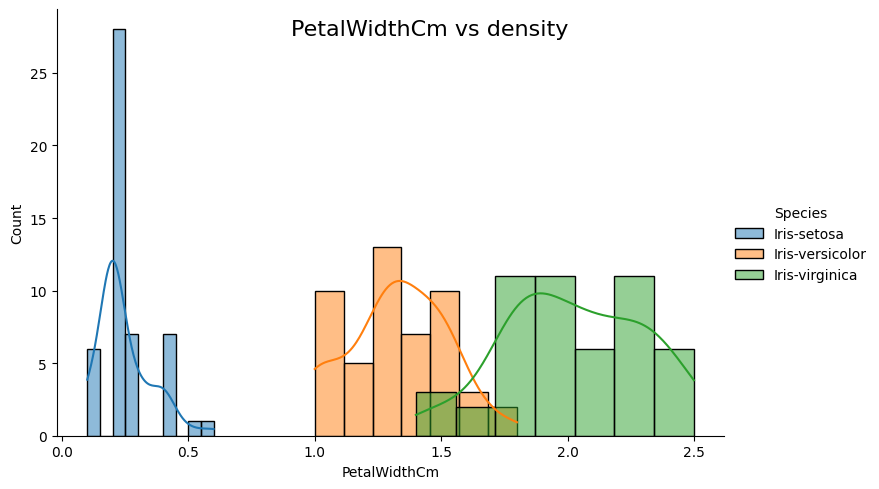

In [25]:
#another histgram

plot = sns.FacetGrid(df, hue="Species", height=5, aspect=1.5) 
plot.map(sns.histplot, "SepalLengthCm", kde=True).add_legend() 
plt.suptitle("SepalLengthCm vs density (Grouped by Species)", x=.5, y=0.95, fontsize=16)

  

plot = sns.FacetGrid(df, hue="Species", height=5, aspect=1.5) 
plot.map(sns.histplot, "SepalWidthCm", kde=True).add_legend() 
plt.suptitle("SepalWidthCm vs density (grouped by Species)", x=.5, y=0.95, fontsize=16)
  

plot = sns.FacetGrid(df, hue="Species", height=5, aspect=1.5) 
plot.map(sns.histplot, "PetalLengthCm", kde=True).add_legend() 
plt.suptitle("PetalLengthCm vs density(Grouped by Species)", x=.5, y=0.95, fontsize=16)

  

plot = sns.FacetGrid(df, hue="Species", height=5, aspect=1.5) 
plot.map(sns.histplot, "PetalWidthCm", kde=True).add_legend() 
plt.suptitle("PetalWidthCm vs density", x=.5, y=0.95, fontsize=16)
#plt.show()
  

In [26]:
# Drop the Species column 
numeric_data = df.drop(columns=['Species'])

# correleation 
print("_______\nCorrelation - species column")
correlation_matrix = numeric_data.corr(method='pearson')
# Display the correlation matrix
print(correlation_matrix)


_______
Correlation - species column
                     Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  \
Id             1.000000       0.716676     -0.397729       0.882747   
SepalLengthCm  0.716676       1.000000     -0.109369       0.871754   
SepalWidthCm  -0.397729      -0.109369      1.000000      -0.420516   
PetalLengthCm  0.882747       0.871754     -0.420516       1.000000   
PetalWidthCm   0.899759       0.817954     -0.356544       0.962757   

               PetalWidthCm  
Id                 0.899759  
SepalLengthCm      0.817954  
SepalWidthCm      -0.356544  
PetalLengthCm      0.962757  
PetalWidthCm       1.000000  


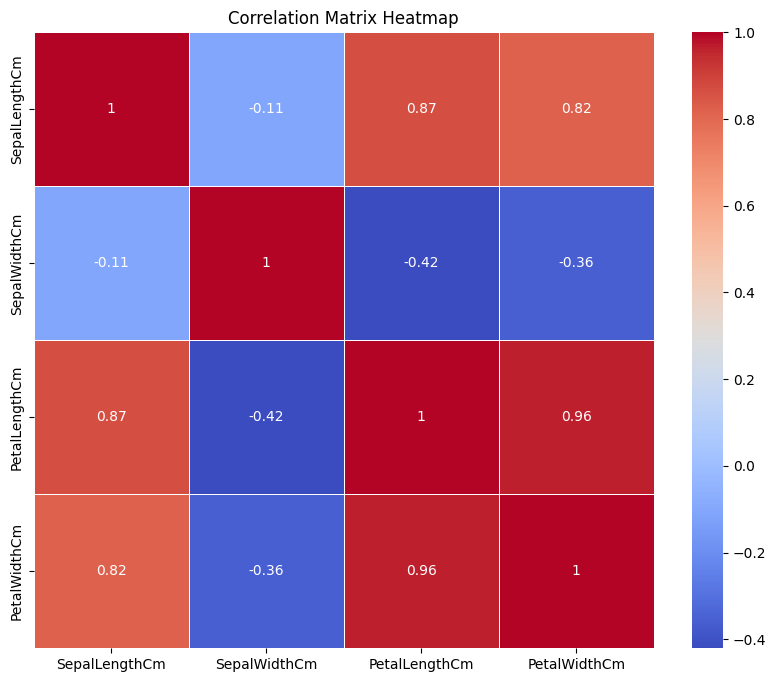

In [27]:
#correlation heatmap
# Drop the 'Id' column from both axes before calculating correlation
correlation_matrix = df.drop(columns=['Id', 'Species']).corr(method='pearson')
# Plot the heatmap
plt.figure(figsize=(10, 8))  # Adjust figure size if needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
# Show the plot
plt.title('Correlation Matrix Heatmap')
plt.show()

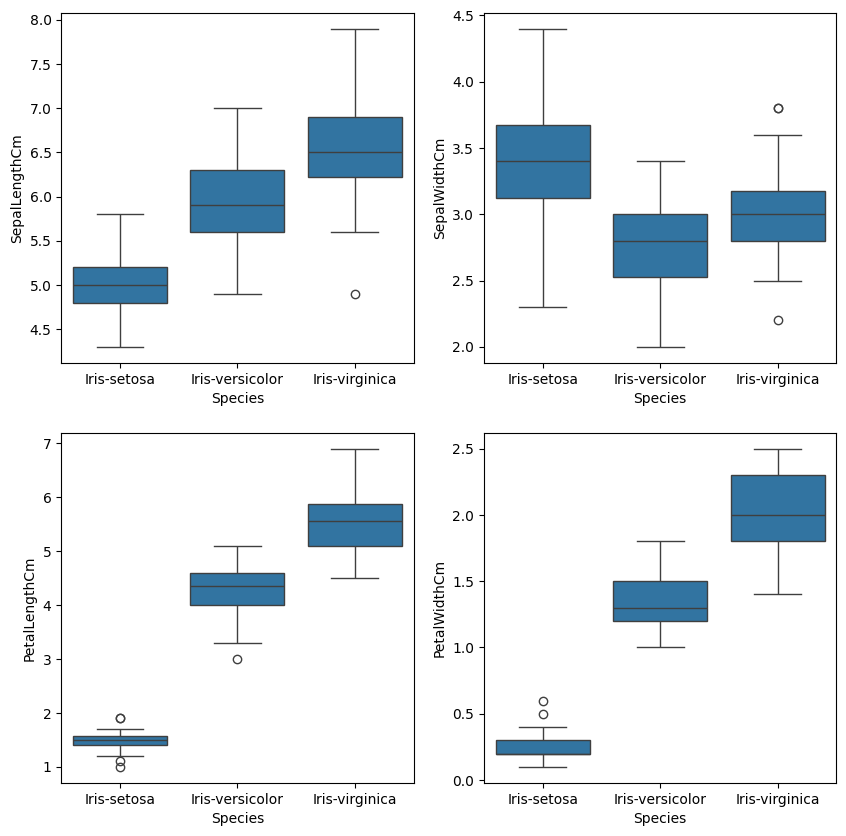

In [28]:
#boxplot
def graph(y): 
    sns.boxplot(x="Species", y=y, data=df) 
  
plt.figure(figsize=(10,10)) 
      
# Adding the subplot at the specified 
# grid position 
plt.subplot(221) 
graph('SepalLengthCm') 
  
plt.subplot(222) 
graph('SepalWidthCm') 
  
plt.subplot(223) 
graph('PetalLengthCm') 
  
plt.subplot(224) 
graph('PetalWidthCm') 
  
plt.show()

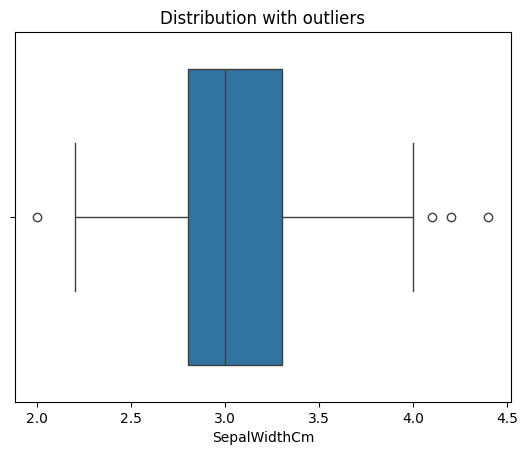

In [29]:
#outliers  
sns.boxplot(x='SepalWidthCm', data=df)
plt.title('Distribution with outliers')
plt.show()

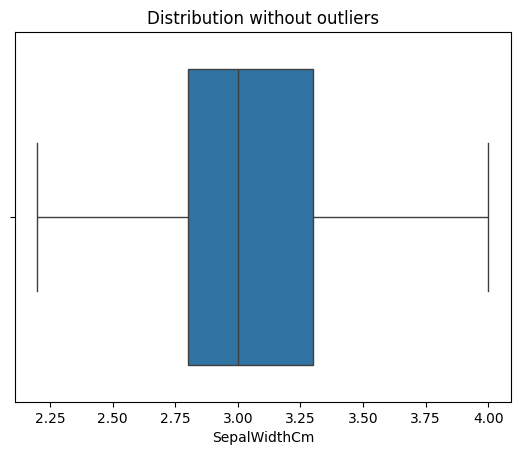

Old Shape:  (146, 6)
New Shape:  (146, 6)


In [30]:
#removing outliers 
# IQR 
Q1 = np.percentile(df['SepalWidthCm'], 25, 
                interpolation = 'midpoint') 
  
Q3 = np.percentile(df['SepalWidthCm'], 75, 
                interpolation = 'midpoint') 
IQR = Q3 - Q1 
  
#print("Old Shape: ", df.shape) 
  
# Upper bound 
upper = np.where(df['SepalWidthCm'] >= (Q3+1.5*IQR)) 
  
# Lower bound 
lower = np.where(df['SepalWidthCm'] <= (Q1-1.5*IQR)) 
  
# Removing the Outliers 
df.drop(upper[0], inplace = True) 
df.drop(lower[0], inplace = True) 
  
#print("New Shape: ", df.shape) 
  
sns.boxplot(x='SepalWidthCm', data=df)
plt.title('Distribution without outliers')
plt.show()
print("Old Shape: ", df.shape) 
print("New Shape: ", df.shape) 